In [92]:
import numpy as np
import math
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Return Period')

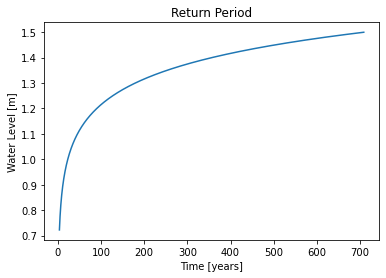

In [93]:
a = 0.145329158
b = 0.546101744
return_period_f = (lambda x: math.exp((x-b)/a))

x_min = 0.722
x_max = 1.5
N = 10000
water_level = np.linspace(x_min,x_max,N)

prob_failure_f = (lambda x: 0.9/0.7*x+(0.1-0.9/0.7*0.8))

plt.plot([return_period_f(x) for x in water_level],water_level)
plt.ylabel('Water Level [m]')
plt.xlabel('Time [years]')
plt.title('Return Period')

Text(0.5, 1.0, 'CDF of Hazard Intensity')

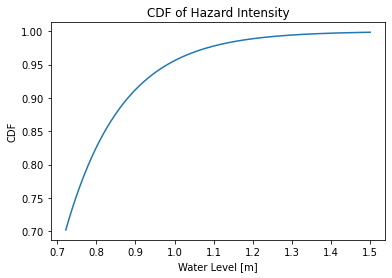

In [94]:
CDF_water_level_f = (lambda x: 1-1/return_period_f(x))

plt.plot(water_level, [CDF_water_level_f(x) for x in water_level])
plt.ylabel('CDF')
plt.xlabel('Water Level [m]')
plt.title('CDF of Hazard Intensity')
#plt.show()

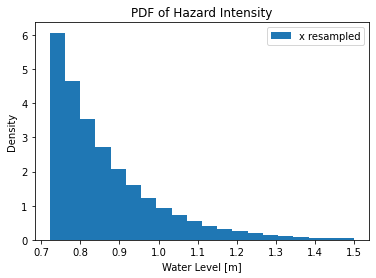

In [95]:
from pynverse import inversefunc
inv_CDF_water_level_f = inversefunc(CDF_water_level_f)

CDF_samples = np.linspace(CDF_water_level_f(x_min),CDF_water_level_f(x_max),N)
water_level_resampled = [inv_CDF_water_level_f(cdf) for cdf in CDF_samples]

plt.hist(np.hstack(water_level_resampled), bins=20 ,density=True, label='x resampled')

plt.ylabel('Density')
plt.xlabel('Water Level [m]')
plt.title('PDF of Hazard Intensity')
plt.legend()

Text(0.5, 1.0, 'PDF of the Probability of Equipment Failure')

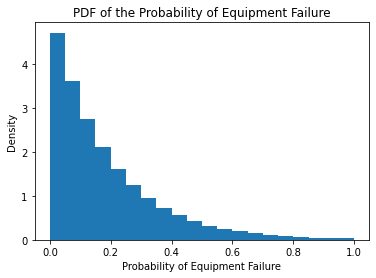

In [96]:
z = [prob_failure_f(x) for x in water_level_resampled]

plt.hist(z, density=True, bins=20)

plt.ylabel('Density')
plt.xlabel('Probability of Equipment Failure')
plt.title('PDF of the Probability of Equipment Failure')

In [97]:
from sklearn.cluster import KMeans
import pandas as pd

data = np.column_stack((np.array(z),np.zeros(len(z))))
n_clusters = 4

kmeans = KMeans(init="random", n_clusters=n_clusters,
                n_init=100, max_iter=300).fit(data)

maxs, mins, nh, var, mean, std = [], [], [], [], [], []
for cluster in range(n_clusters):
    maxs.append(np.array(z)[np.where(kmeans.labels_==cluster)].max())
    mins.append(np.array(z)[np.where(kmeans.labels_==cluster)].min())
    nh.append(np.count_nonzero(kmeans.labels_==cluster))
    var.append(np.var(np.array(z)[np.where(kmeans.labels_==cluster)]))
    std.append(np.std(np.array(z)[np.where(kmeans.labels_==cluster)]))
    mean.append(np.mean(np.array(z)[np.where(kmeans.labels_==cluster)]))

labels = list(range(n_clusters))
results = [[i1,i2,i3,i4,i5,i6,i7] for (i1,i2,i3,i4,i5,i6,i7) in zip(labels, mins, maxs, nh, var, std, mean)]

df = pd.DataFrame(results, columns=['cluster label', 'lower boundary', 'upper boundary', 'Nh', 'var', 'std', 'mean'])
df.sort_values(by=['lower boundary'])

,cluster label,lower boundary,upper boundary,Nh,var,std,mean
2,2,-0.000286,0.127517,4978,0.001330,0.036475,0.056389
1,1,0.127554,0.293483,2984,0.002208,0.046992,0.198402
3,3,0.293572,0.533077,1507,0.004419,0.066474,0.388433
0,0,0.533401,1.000000,531,0.013724,0.117150,0.678564


Text(0.5, 1.0, 'Culuster using kmeans; k=4')

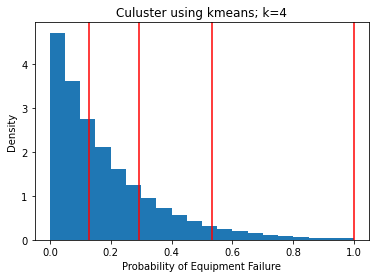

In [98]:
plt.hist(z, density=True, bins=20)
for b in maxs:
    plt.axvline(x = b, color = 'r')

plt.ylabel('Density')
plt.xlabel('Probability of Equipment Failure')
plt.title('Culuster using kmeans; k=4')

Text(0.5, 1.0, 'Culuster using Jenks natural breaks; k=4')

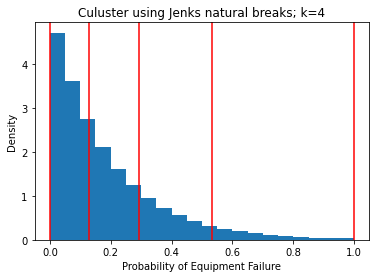

In [99]:
import jenkspy as jp
bins=jp.jenks_breaks(z, n_classes=n_clusters)

plt.hist(z, density=True, bins=20)
for b in bins:
    plt.axvline(x = b, color = 'r')

plt.ylabel('Density')
plt.xlabel('Probability of Equipment Failure')
plt.title('Culuster using Jenks natural breaks; k=4')

In [100]:
maxs, mins, nh, var, mean, std = [], [], [], [], [], []
for i in range(n_clusters):
    data_i = np.array(z)[np.where((z>= bins[i]) & (z<bins[i+1]))]

    maxs.append(data_i.max())
    mins.append(data_i.min())
    nh.append(np.count_nonzero(data_i))
    var.append(np.var(data_i))
    std.append(np.std(data_i))
    mean.append(np.mean(data_i))

labels = list(range(n_clusters))
results = [[i1,i2,i3,i4,i5,i6,i7] for (i1,i2,i3,i4,i5,i6,i7) in zip(labels, mins, maxs, nh, var, std, mean)]

df = pd.DataFrame(results, columns=['cluster label', 'lower boundary', 'upper boundary', 'Nh', 'var', 'std', 'mean'])
df.sort_values(by=['lower boundary'])

,cluster label,lower boundary,upper boundary,Nh,var,std,mean
0,0,-0.000286,0.127038,4965,0.001321,0.036342,0.056203
1,1,0.127075,0.292946,2991,0.002207,0.046976,0.197902
2,2,0.293035,0.533077,1513,0.004437,0.066611,0.388055
3,3,0.533401,0.996111,530,0.013555,0.116425,0.677958


In [101]:
df['var'].sum()

0.02151917760896271

In [103]:
# dictionary of lists  
dict = {'z': z}  
df = pd.DataFrame(dict) 
# saving the dataframe 
df.to_csv('z_data.csv')

In [104]:
bins

[-0.0002857163853924316,
 0.1270750166843878,
 0.2930351447733174,
 0.5334007318468422,
 0.9999999893815711]